## Data Cleaning and EDA
In this notebook, data cleaning and exploration will be done.

In [31]:
# imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
from scipy import stats
#install the latest v of pandas profiling
import sys
!{sys.executable} -m pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport
#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
print("All imported successfully!")
%matplotlib inline

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261277 sha256=5b1fa91b1a4b2acd9f461c4dc105fbeb80e061e655deb9796a2d4b3175815158
  Stored in directory: C:\Users\2awan\AppData\Local\Temp\pip-ephem-wheel-cache-ruc4q7_b\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling
All imported successfully!


In [32]:
# read data 
auto = pd.read_csv("../data/autoinsurance-data.csv")
auto.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,'D',5,0,55,50,'B12','Regular',1217,'R82'
1,3.0,1,0.77,'D',5,0,55,50,'B12','Regular',1217,'R82'
2,5.0,1,0.75,'B',6,2,52,50,'B12','Diesel',54,'R22'
3,10.0,1,0.09,'B',7,0,46,50,'B12','Diesel',76,'R72'
4,11.0,1,0.84,'B',7,0,46,50,'B12','Diesel',76,'R72'


In [33]:
auto.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


In [34]:
#generate html summarization report about data
# report = ProfileReport(auto)
# report.to_file(output_file = "report.html")

Based on the report, 

- total of 678,013 records, 12 features (8 numerical, 4 categorical) with no missing data and no duplicates

- `IDpol` refer to the distinct policyholders. This column will be dropped.

- `ClaimNb` columns has 95% of zeros meaning majoirty of the policyholders have yet to make an insurance claim. 

- `Exposure` shows that majority has exposure of 1 while others are lesser. There are outliers where numbers above 1 do not make sense. These will be dropped prior to modelling. 

- Majority of policyholders are in `Area` C.

- Majority of `VehPower` falls within the range of 5.0 and 7.5. The distribution is right-skewed, so best to drop off the extreme end prior to modelling. 

- Maximimum `VehAge` is 100 while most are withn 2 to 11 years. Extreme values skew the data,so these will be dropped as it doesn't really make sense that cars beyond a certain age could still function. 

- `DrivAge` shows a right-skewed distribution, with most being between 34 and 55 years old. 

- Most have a `BonusMalus` of 50 while extreme values can go up to 200+. 

- there are 11 distinct `VehBrand` with B1, B2 and B12 being the most common. 

- Either regular or diesel for `VehGas`.

- `Density` is right skewed. 

In [35]:
# change column names to lowercase
auto.columns = [x.lower() for x in auto.columns]

In [36]:
# drop IDpol and drop extreme values
print("======= Shape before dropping =======")
print(auto.shape)
# drop IDpol
auto.drop(columns = 'idpol', inplace = True)
# drop exposure >1
auto = auto[auto['exposure']<=1]
# drop records with vehage > 20 year
auto = auto[auto['vehage']<=20]
print("======= Shape after dropping =======")
print(auto.shape)

======= Shape before dropping =======
(678013, 12)
======= Shape after dropping =======
(668502, 11)


In [37]:
# identify categorical vs non-categorical vairables
auto.columns

Index(['claimnb', 'exposure', 'area', 'vehpower', 'vehage', 'drivage',
       'bonusmalus', 'vehbrand', 'vehgas', 'density', 'region'],
      dtype='object')

Nominal categorical variables : 
- area
- vehbrand
- vehgas
- region

Ordinal categorical variables : 
- vehpower

Numerical variables :
- claimnb
- exposure
- vehage
- drivage
- bonusmalus
- density

In [40]:
# one hot encode nominal categorical variables
nom_features = ['area','vehbrand','vehgas','region']
auto = pd.get_dummies(auto, columns = nom_features)

In [41]:
# check shape
print("======= Shape after getting dummies =======")
print(auto.shape)

======= Shape after getting dummies =======
(668502, 48)


In [42]:
#assign ratings for ordinal categorical variables
auto['vehpower'].unique()

array([ 5,  6,  7,  4,  9, 15,  8, 10, 12, 11, 14, 13], dtype=int64)

In [43]:
auto['vehpower'] = auto['vehpower'].map({4:1,
                                         5:2,
                                         6:3,
                                         7:4,
                                         8:5,
                                         9:6,
                                        10:7,
                                        11:8,
                                        12:9,
                                        13:10,
                                        14:11,
                                        15:12})

In [45]:
# feature engineer a more appropriate target variable
# insurance companies are more interested in claim frequency ie. number of claims/exposure
auto['claimfreq'] = auto['claimnb']/auto['exposure']

In [46]:
#preview data
auto.head()

,claimnb,exposure,vehpower,vehage,drivage,bonusmalus,density,area_'A',area_'B',area_'C',area_'D',area_'E',area_'F',vehbrand_'B1',vehbrand_'B10',vehbrand_'B11',vehbrand_'B12',vehbrand_'B13',vehbrand_'B14',vehbrand_'B2',vehbrand_'B3',vehbrand_'B4',vehbrand_'B5',vehbrand_'B6',vehgas_'Diesel',vehgas_'Regular',region_'R11',region_'R21',region_'R22',region_'R23',region_'R24',region_'R25',region_'R26',region_'R31',region_'R41',region_'R42',region_'R43',region_'R52',region_'R53',region_'R54',region_'R72',region_'R73',region_'R74',region_'R82',region_'R83',region_'R91',region_'R93',region_'R94',claimfreq
0,1,0.10,2,0,55,50,1217,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10.000000
1,1,0.77,2,0,55,50,1217,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.298701
2,1,0.75,3,2,52,50,54,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.333333
3,1,0.09,4,0,46,50,76,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11.111111
4,1,0.84,4,0,46,50,76,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.190476


In [47]:
#save out clean data
auto.to_csv("../data/auto_clean.csv", index = False)

In [48]:
#preview clean data
auto_clean = pd.read_csv("../data/auto_clean.csv")
auto_clean.head()

,claimnb,exposure,vehpower,vehage,drivage,bonusmalus,density,area_'A',area_'B',area_'C',area_'D',area_'E',area_'F',vehbrand_'B1',vehbrand_'B10',vehbrand_'B11',vehbrand_'B12',vehbrand_'B13',vehbrand_'B14',vehbrand_'B2',vehbrand_'B3',vehbrand_'B4',vehbrand_'B5',vehbrand_'B6',vehgas_'Diesel',vehgas_'Regular',region_'R11',region_'R21',region_'R22',region_'R23',region_'R24',region_'R25',region_'R26',region_'R31',region_'R41',region_'R42',region_'R43',region_'R52',region_'R53',region_'R54',region_'R72',region_'R73',region_'R74',region_'R82',region_'R83',region_'R91',region_'R93',region_'R94',claimfreq
0,1,0.10,2,0,55,50,1217,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10.000000
1,1,0.77,2,0,55,50,1217,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.298701
2,1,0.75,3,2,52,50,54,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.333333
3,1,0.09,4,0,46,50,76,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11.111111
4,1,0.84,4,0,46,50,76,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.190476


In [49]:
auto_clean.describe()

,claimnb,exposure,vehpower,vehage,drivage,bonusmalus,density,area_'A',area_'B',area_'C',area_'D',area_'E',area_'F',vehbrand_'B1',vehbrand_'B10',vehbrand_'B11',vehbrand_'B12',vehbrand_'B13',vehbrand_'B14',vehbrand_'B2',vehbrand_'B3',vehbrand_'B4',vehbrand_'B5',vehbrand_'B6',vehgas_'Diesel',vehgas_'Regular',region_'R11',region_'R21',region_'R22',region_'R23',region_'R24',region_'R25',region_'R26',region_'R31',region_'R41',region_'R42',region_'R43',region_'R52',region_'R53',region_'R54',region_'R72',region_'R73',region_'R74',region_'R82',region_'R83',region_'R91',region_'R93',region_'R94',claimfreq
count,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.00000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000,668502.000000
mean,0.053512,0.526590,3.443382,6.812542,45.456910,59.790820,1798.860552,0.152157,0.111129,0.282883,0.224177,0.203058,0.026595,0.238064,0.025192,0.020007,0.24815,0.017807,0.005803,0.235471,0.078528,0.037509,0.051222,0.042247,0.492310,0.507690,0.103723,0.004507,0.011897,0.012978,0.235094,0.016132,0.015508,0.040411,0.019328,0.003269,0.001967,0.057089,0.062362,0.027783,0.046290,0.025313,0.006702,0.125243,0.007840,0.052633,0.117180,0.006752,0.266272
std,0.240682,0.363616,2.039812,5.231204,14.123222,15.655887,3965.211384,0.359173,0.314292,0.450400,0.417040,0.402276,0.160898,0.425899,0.156708,0.140026,0.43194,0.132249,0.075953,0.424293,0.269001,0.190006,0.220450,0.201152,0.499941,0.499941,0.304901,0.066983,0.108422,0.113181,0.424058,0.125982,0.123561,0.196922,0.137676,0.057077,0.044308,0.232012,0.241812,0.164351,0.210113,0.157075,0.081588,0.330994,0.088196,0.223299,0.321635,0.081895,4.618328
min,0.000000,0.002732,1.000000,0.000000,18.000000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.170000,2.000000,2.000000,34.000000,50.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.490000,3.000000,6.000000,44.000000,50.000000,393.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.980000,4.000000,11.000000,55.000000,65.000000,1666.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,1.

### Data Exploration

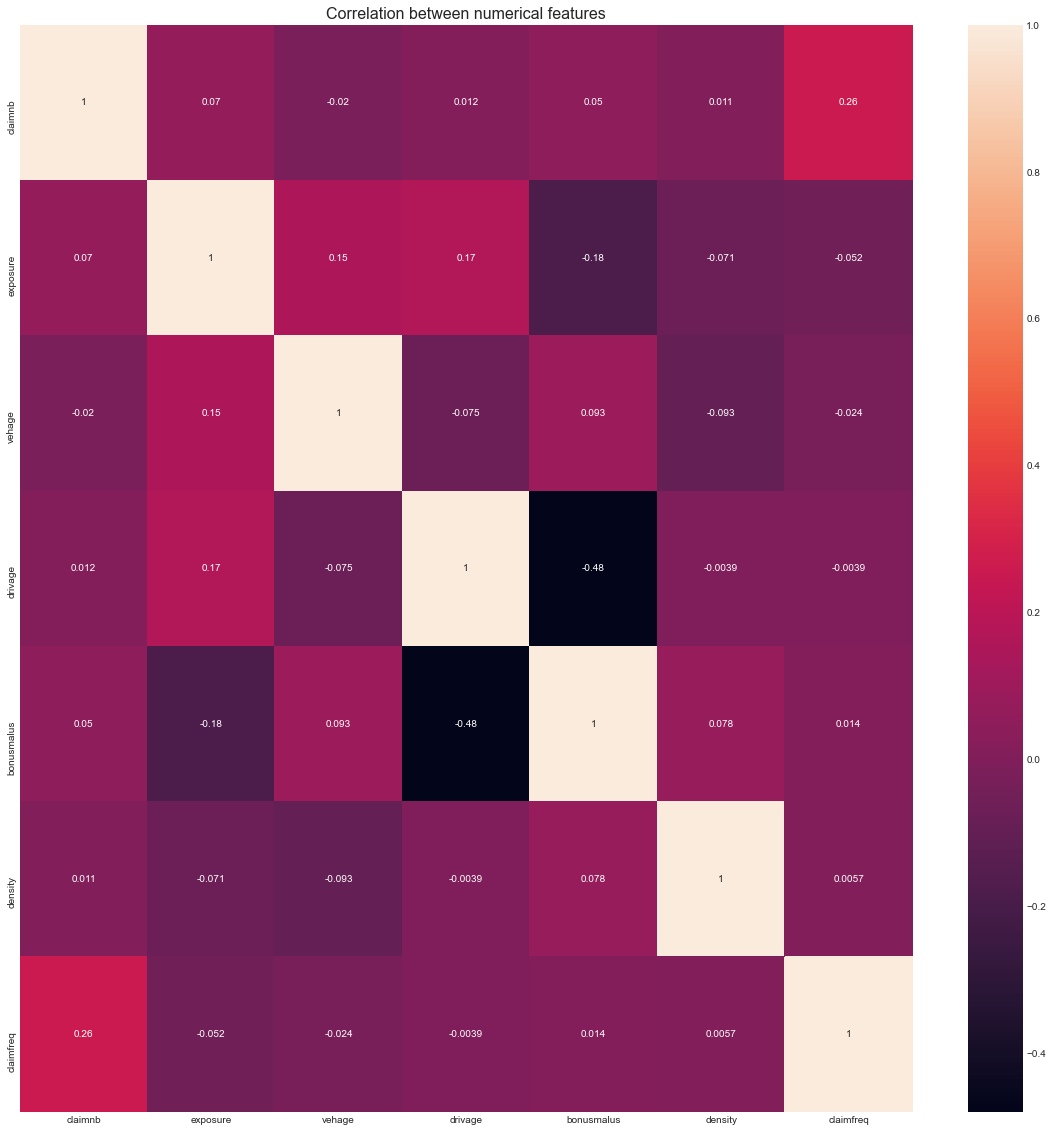

In [50]:
# check multicollinearity 
plt.figure(figsize = (20,20))
sns.heatmap(auto_clean[['claimnb','exposure','vehage','drivage','bonusmalus','density','claimfreq']].corr(), annot = True)
plt.title("Correlation between numerical features", fontsize = 16);

- very little to no correlation between the features
- most negative correlation between the driver's age and bonus malus, which is reasonably intuitive, whereby younger drivers are tend to have more malus, from lack of driving experience.

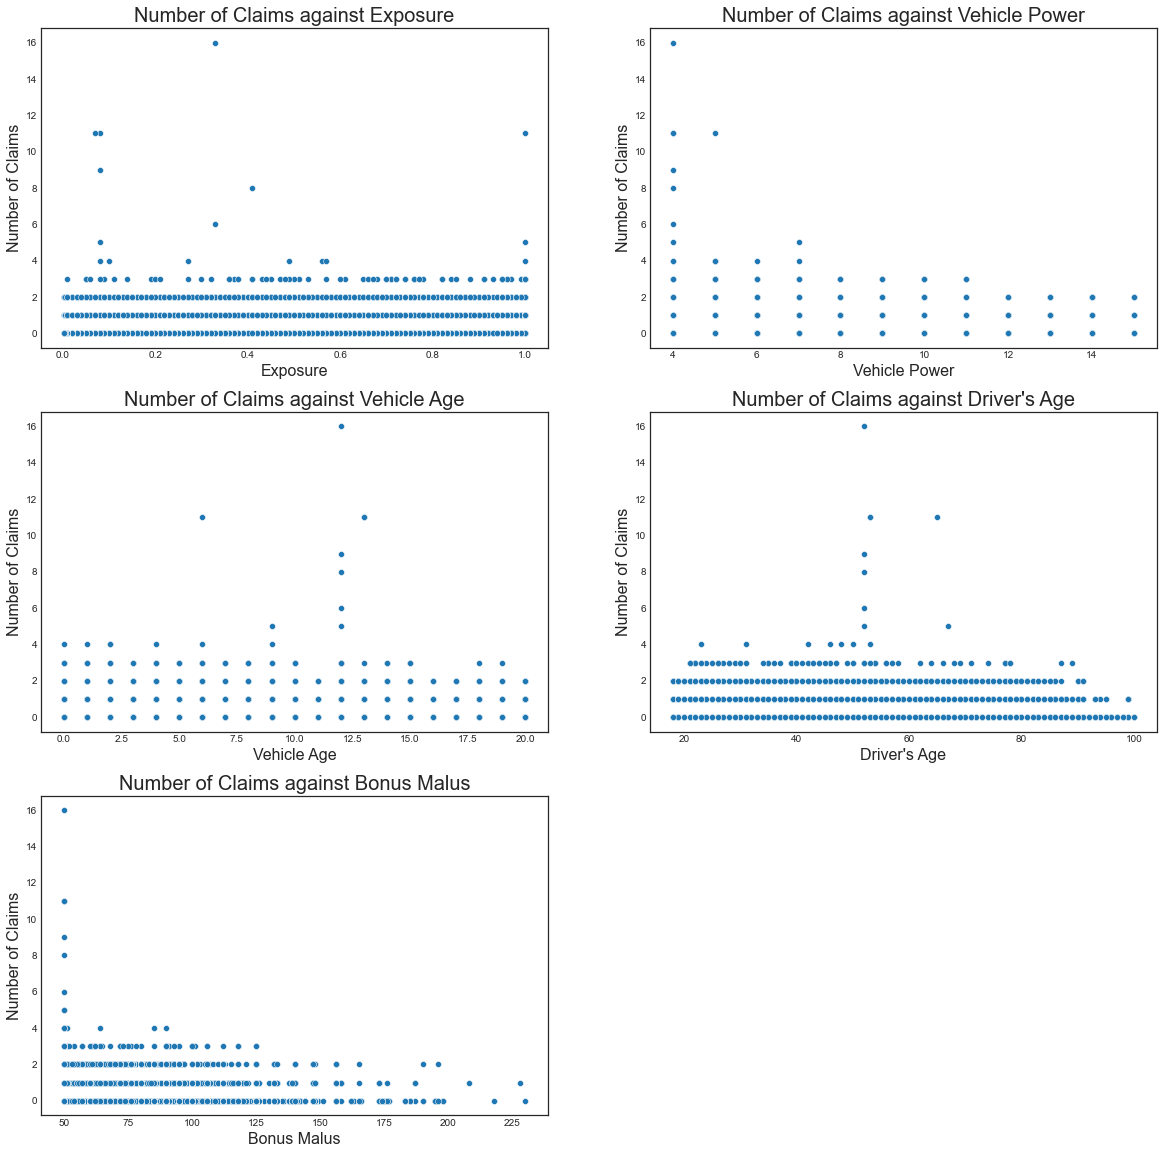

In [30]:
#view how numerical variables
fig, axs = plt.subplots(figsize = (20,20))
ax1 = plt.subplot(321)
sns.scatterplot(ax = ax1, y = 'claimfreq',x = 'Exposure', data = auto_clean)
ax1.set_title("Number of Claims against Exposure", fontsize = 20)
ax1.set_xlabel("Exposure", fontsize = 16)
ax1.set_ylabel("Number of Claims", fontsize = 16);

ax2 = plt.subplot(322)
sns.scatterplot(ax = ax2, y = 'claimfreq',x = 'VehPower', data = auto_clean)
ax2.set_title("Number of Claims against Vehicle Power", fontsize= 20)
ax2.set_xlabel("Vehicle Power", fontsize = 16)
ax2.set_ylabel("Number of Claims", fontsize = 16);

ax3 = plt.subplot(323)
sns.scatterplot(ax = ax3, y = 'claimfreq',x = 'VehAge', data = auto_clean)
ax3.set_title("Number of Claims against Vehicle Age", fontsize = 20)
ax3.set_xlabel("Vehicle Age", fontsize = 16)
ax3.set_ylabel("Number of Claims", fontsize = 16);

ax4 = plt.subplot(324)
sns.scatterplot(ax = ax4, y = 'ClaimNb',x = 'DrivAge', data = auto_clean)
ax4.set_title("Number of Claims against Driver's Age", fontsize = 20)
ax4.set_xlabel("Driver's Age", fontsize = 16)
ax4.set_ylabel("Number of Claims", fontsize = 16);

ax5 = plt.subplot(325)
sns.scatterplot(ax = ax5, y = 'ClaimNb',x = 'BonusMalus', data = auto_clean)
ax5.set_title("Number of Claims against Bonus Malus", fontsize = 20)
ax5.set_xlabel("Bonus Malus", fontsize = 16)
ax5.set_ylabel("Number of Claims", fontsize = 16);